In [1]:
import Function as f

In [2]:
import numpy as np
import pandas as pd

In [3]:
NUM_SAMPLES = 500
NUM_TRAIN = int(NUM_SAMPLES * 0.9)
NUM_VAL = int(NUM_SAMPLES * 0.1)
Epsilons = [10,10]
NUM_FEATURES = 5

In [4]:
np.random.seed(NUM_SAMPLES)

In [5]:
X, Y, survival_times = f.Generating_Synthetic_Set(NUM_SAMPLES, NUM_FEATURES, Epsilons, bias = False)

Discard the top 5% longevity training samples

In [6]:
five_percent = int(len(survival_times) * 0.05)
five_percent_indices = np.argsort(survival_times)[(-1) * five_percent:]
threshold_age = survival_times[five_percent_indices[0]]
for i in five_percent_indices:
    while(True):
        Epsilon_1, Epsilon_2 = Epsilons
        _lambda = Epsilon_1 * np.sum(X[i, :] ** 2) + Epsilon_2 * np.sum(X[i, :])
        age = np.ceil(np.random.exponential(_lambda, size=1))
        if age <= threshold_age:
            survival_times[i] = age
            break
NUM_TASKS = int(np.max(survival_times))
Y = np.ones((NUM_SAMPLES, NUM_TASKS))
# the lifetime matrix of all samples, if one sample leave at the time interval k, then from Y[i,k](inlcude)  all follwoed entries are -1
for i in range(NUM_SAMPLES):
    Y[i, int(survival_times[i]):] = -1

In [7]:
Kernel_Matrix = f.Generating_Kernel(X, "Quick_Gaussian_Kernel")
Kernel_Matrix_Train = Kernel_Matrix[:NUM_TRAIN,:NUM_TRAIN]
Kernel_Matrix_Val = Kernel_Matrix[NUM_TRAIN:,:NUM_TRAIN]

There are  89988 pairs of samples of similarity between 0.0 and 0.1 which have an average age_gap  58.64584166777792 and the median is: 43.0
There are  55208 pairs of samples of similarity between 0.1 and 0.2 which have an average age_gap  48.67809013186495 and the median is: 32.0
There are  36920 pairs of samples of similarity between 0.2 and 0.3 which have an average age_gap  45.3409534127844 and the median is: 29.0
There are  25398 pairs of samples of similarity between 0.3 and 0.4 which have an average age_gap  42.768406961178044 and the median is: 26.0
There are  17476 pairs of samples of similarity between 0.4 and 0.5 which have an average age_gap  41.237010757610435 and the median is: 25.0
There are  11506 pairs of samples of similarity between 0.5 and 0.6 which have an average age_gap  39.38397357900226 and the median is: 24.0
There are  6998 pairs of samples of similarity between 0.6 and 0.7 which have an average age_gap  37.706201771934836 and the median is: 22.0
There are  3

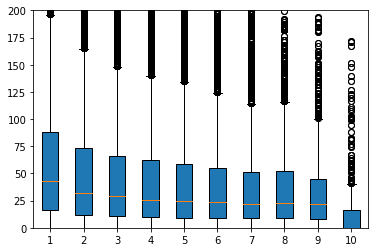

In [8]:
f.Validate_Synthetic_DataSet(Kernel_Matrix, survival_times)

In [9]:
print(max(survival_times))

212.0


In [10]:
covairates_survivaltimes = np.concatenate((X, survival_times[:,np.newaxis]),axis = 1)
cov_st_censored = np.concatenate((covairates_survivaltimes, np.ones((NUM_SAMPLES,1))),axis = 1)
bias_cov_st_censored = np.concatenate((np.ones((NUM_SAMPLES,1)), cov_st_censored),axis = 1)

In [11]:
df = pd.DataFrame(cov_st_censored)
if NUM_FEATURES == 3:
    df.columns = ['cov0', 'cov1','cov2','survival_time','censored']
if NUM_FEATURES == 5:
    df.columns = ['cov0', 'cov1','cov2','cov3','cov4','survival_time','censored']
elif NUM_FEATURES == 10:
    df.columns = ['cov0', 'cov1','cov2','cov3', 'cov4', 'cov5', 'cov6','cov7', 'cov8', 'cov9','survival_time','censored']

file_name = str(NUM_SAMPLES) + "("+str(NUM_TRAIN) + "+" + str(NUM_VAL) + ")"+ str(NUM_FEATURES) + ".csv"
df.to_csv(file_name)